In [3]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#The usage of the function whene the row range is double

def double_range_extract(start_col : int, end_col: int, start_row1: int, end_row1: int, start_row2: int, end_row2: int, type:str, area: str, csv_name:str,path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    
    
    type_df = type
    
    area_df = area

   
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
        sheet = sheet_name.replace(")","")
        sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
        sheet = sheet.replace(" ", "")
#         if sheet.endswith('-'):
#             sheet = sheet[:-1]
#         else:
#             sheet = sheet
            
#         if "--" in sheet:
#             sheet = sheet.replace("--", "-")
#         else:
#             sheet = sheet
        
        
        
    
        
         # Initialize the sum to 0
            # Initialize the sum to 0
        total_sum = 0

        # Loop over each row in the first range
        for row in worksheet.iter_rows(min_row=start_row1, max_row=end_row1):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # Loop over each row in the second range
        for row in worksheet.iter_rows(min_row=start_row2, max_row=end_row2):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # # Return the total sum
        # return total_sum
        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df.drop(0)
    print(result_df.size)
    result_df['date'] = result_df['date'] + "-2019"
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%Y")
    result_df.to_csv(csv_name)
    print(csv_name)
    


In [32]:
double_range_extract(start_col = 5, end_col= 7, start_row1= 11, end_row1= 23, start_row2= 45, end_row2=74, type = 'Infected', area= 'Dhaka_inner', csv_name='CSV/Dhaka_inner_infected_dengue.csv',path="2019/3.Dengue_20190825.xlsx")

387
CSV/Dhaka_inner_infected_dengue.csv


In [23]:

dfs = pd.read_csv('CSV/2019/dhaka_inner_infected_dengue.csv')

dfs

,Unnamed: 0,date,Infected_Cases,Area
0,1,2019-12-30,7,Dhaka_inner
1,2,2019-12-29,3,Dhaka_inner
2,3,2019-12-28,6,Dhaka_inner
3,4,2019-12-27,13,Dhaka_inner
4,5,2019-12-26,13,Dhaka_inner
...,...,...,...,...
124,125,2019-08-28,551,Dhaka_inner
125,126,2019-08-27,608,Dhaka_inner
126,127,2019-08-26,577,Dhaka_inner
127,128,2019-08-25,607,Dhaka_inner


In [30]:

# dfs = pd.read_csv('CSV/2019/dhaka_inner_infected_dengue.csv')

# df = dfs.rename(columns={'Infected_Cases': 'Infected'}, inplace=True)

# print(str(df)) 

#df.to_csv('CSV/2019/Dhaka_inner_infected_dengue.csv', index=False)

TypeError: 'DataFrame' object is not callable

In [8]:
def visual(csv_path: str ):
    # Load data into a DataFrame
    df = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')
    # Create a plot of total infected cases over time
    ax = df.plot(y=df.columns[1], legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel(df.columns[1])
    ax.set_title(f'Total Dengue {df.columns[1]} Cases in {df[df.columns[2]].unique()} Inner Over Time')
    plt.show()

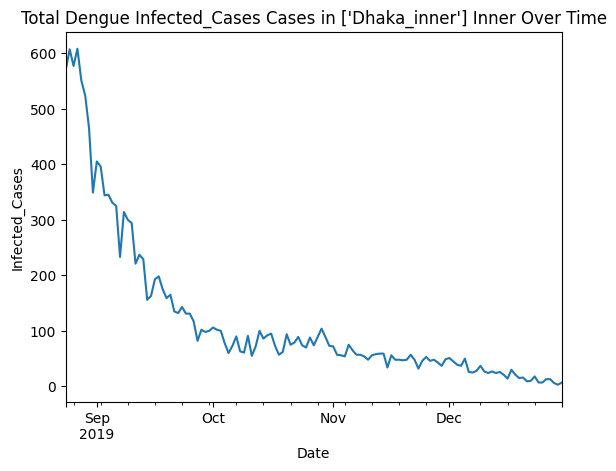

In [8]:
visual("CSV/dhaka_inner_infected_dengue.csv") 

In [11]:
de19 = pd.read_csv("CSV/dhaka_inner_infected_dengue.csv").tail()

In [12]:
de19

,Unnamed: 0,date,Infected_Cases,Area
124,125,2019-08-28,551,Dhaka_inner
125,126,2019-08-27,608,Dhaka_inner
126,127,2019-08-26,577,Dhaka_inner
127,128,2019-08-25,607,Dhaka_inner
128,129,2019-08-24,570,Dhaka_inner


In [3]:
#The usage of the function whene the row range is single

def single_range_extract(start_col: int, end_col: int, start_row: int, end_row: int, type:str, area: str, csv_name:str, path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    type_df = type
    
    area_df = area

   
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
        sheet = sheet_name.replace(")","")
        sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
        sheet = sheet.replace(" ", "")
         # Initialize the sum to 0
       # Initialize the sum to 0
        total_sum = 0


        # Loop over each row in the range
        for row in worksheet.iter_rows(min_row=start_row, max_row=end_row):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:
                    
                     if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value


        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df.drop(0)
    result_df['date'] = result_df['date'] + "-2019"
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%Y")
    result_df.to_csv(csv_name)
    print(csv_name)

In [16]:
single_range_extract(start_col= 5, end_col= 7, start_row= 35, end_row= 35, type="Infected", area = "Mymenshing", csv_name="Mymenshing_Dengue_2019.csv", path ="2019/3.Dengue_20190825.xlsx")

Mymenshing_Dengue_2019.csv


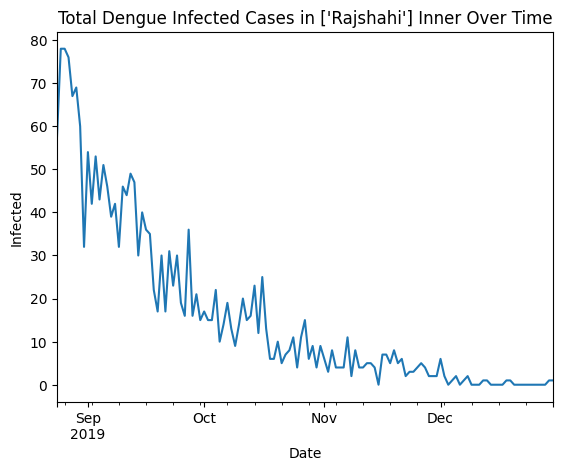

In [9]:
visual("CSV/2019/Rajshahi_Dengue_2019.csv")

In [11]:
de19 = pd.read_csv("CSV/2019/Rajshahi_Dengue_2019.csv").tail()

In [12]:
de19

,Unnamed: 0,date,Infected,Area
124,125,2019-08-28,67,Rajshahi
125,126,2019-08-27,76,Rajshahi
126,127,2019-08-26,78,Rajshahi
127,128,2019-08-25,78,Rajshahi
128,129,2019-08-24,57,Rajshahi


In [15]:
single_range_extract(start_col= 5, end_col= 7, start_row= 30, end_row= 30, type="Infected", area = "khulna", csv_name="CSV/Khulna_Dengue_2019.csv", path ="2019/3.Dengue_20190825.xlsx")

<Worksheet "31.12">
31-12
<Worksheet "30.12">
30-12
<Worksheet "29.12">
29-12
<Worksheet "28.12">
28-12
<Worksheet "27.12">
27-12
<Worksheet "26.12">
26-12
<Worksheet "25.12">
25-12
<Worksheet "24.12">
24-12
<Worksheet "23.12">
23-12
<Worksheet "22.12">
22-12
<Worksheet "21.12">
21-12
<Worksheet "20.12">
20-12
<Worksheet "19.12">
19-12
<Worksheet "18.12">
18-12
<Worksheet "17.12">
17-12
<Worksheet "16.12">
16-12
<Worksheet "15.12">
15-12
<Worksheet "14.12">
14-12
<Worksheet "13.12">
13-12
<Worksheet "12.12">
12-12
<Worksheet "11.12">
11-12
<Worksheet "10.12">
10-12
<Worksheet "09.12">
09-12
<Worksheet "08.12">
08-12
<Worksheet "07.12">
07-12
<Worksheet "06.12">
06-12
<Worksheet "05.12">
05-12
<Worksheet "04.12">
04-12
<Worksheet "03.12">
03-12
<Worksheet "02.12">
02-12
<Worksheet "01.12">
01-12
<Worksheet "30.11">
30-11
<Worksheet "29.11">
29-11
<Worksheet "28.11">
28-11
<Worksheet "27.11">
27-11
<Worksheet "26.11">
26-11
<Worksheet "25.11">
25-11
<Worksheet "24.11">
24-11
<Worksheet "

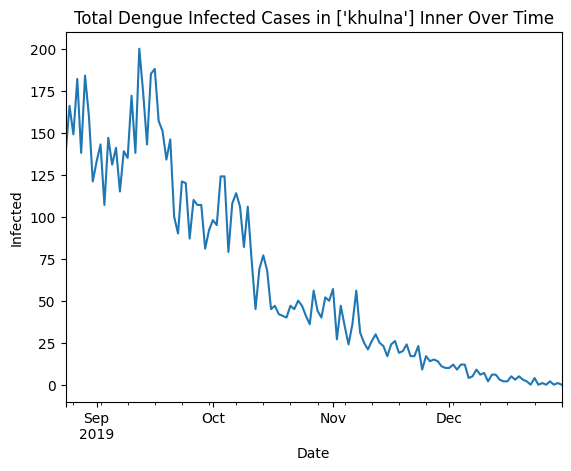

In [16]:
visual('CSV/Khulna_Dengue_2019.csv')

In [17]:
single_range_extract(start_col= 5, end_col= 7, start_row= 31, end_row= 31, type="Infected", area = "Rangpur", csv_name="Rangpur_Dengue_2019.csv", path ="2019/3.Dengue_20190825.xlsx")

<Worksheet "31.12">
31-12
<Worksheet "30.12">
30-12
<Worksheet "29.12">
29-12
<Worksheet "28.12">
28-12
<Worksheet "27.12">
27-12
<Worksheet "26.12">
26-12
<Worksheet "25.12">
25-12
<Worksheet "24.12">
24-12
<Worksheet "23.12">
23-12
<Worksheet "22.12">
22-12
<Worksheet "21.12">
21-12
<Worksheet "20.12">
20-12
<Worksheet "19.12">
19-12
<Worksheet "18.12">
18-12
<Worksheet "17.12">
17-12
<Worksheet "16.12">
16-12
<Worksheet "15.12">
15-12
<Worksheet "14.12">
14-12
<Worksheet "13.12">
13-12
<Worksheet "12.12">
12-12
<Worksheet "11.12">
11-12
<Worksheet "10.12">
10-12
<Worksheet "09.12">
09-12
<Worksheet "08.12">
08-12
<Worksheet "07.12">
07-12
<Worksheet "06.12">
06-12
<Worksheet "05.12">
05-12
<Worksheet "04.12">
04-12
<Worksheet "03.12">
03-12
<Worksheet "02.12">
02-12
<Worksheet "01.12">
01-12
<Worksheet "30.11">
30-11
<Worksheet "29.11">
29-11
<Worksheet "28.11">
28-11
<Worksheet "27.11">
27-11
<Worksheet "26.11">
26-11
<Worksheet "25.11">
25-11
<Worksheet "24.11">
24-11
<Worksheet "

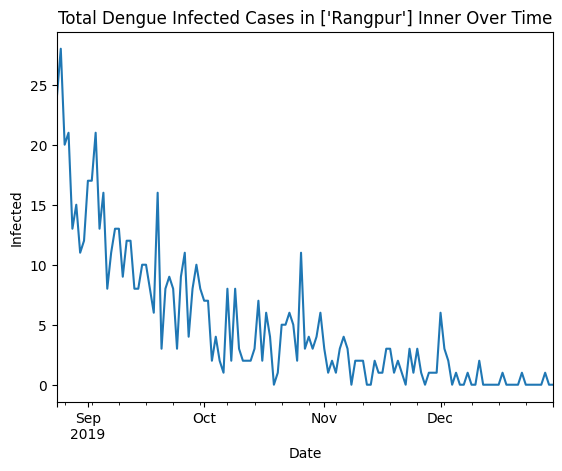

In [21]:
visual("Rangpur_Dengue_2019.csv")